In [1]:
import matplotlib
%matplotlib inline
from gwpy.timeseries import TimeSeries
import numpy

In [2]:
tf_file_name = 'inspiral_t_f.txt'
event_gps = 1246048404.6

# data downloaded from LIGO-T2000470
hoft_file_name = 'L-L1_HOFT_C01_T1700406_v4_T1700406_v4-1246048256-4096.gwf'
glitch_sub_hoft_channel_name = 'L1:DCS-CALIB_STRAIN_CLEAN_C01_T1700406_v4_T1700406_v4'

In [3]:
time,frequency = numpy.loadtxt(tf_file_name, unpack=True)

In [4]:
hoft_data = TimeSeries.read(hoft_file_name,channel=glitch_sub_hoft_channel_name,
                            start=event_gps-32,end=event_gps+32)

In [5]:
hoft_q_trans = hoft_data.q_transform(outseg=(event_gps-2.0,event_gps+2.0),qrange=(10,20))

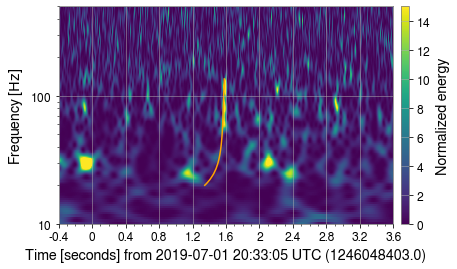

In [6]:
plot = hoft_q_trans.plot(figsize=[6,4])
ax = plot.gca()
ax.plot(time,frequency,color='orange')
ax.set_yscale('log')
ax.set_ylim(10,500)
ax.colorbar(cmap='viridis', label='Normalized energy',clim=(0,15))
plot.show()